## Лабораторна робота **No. 1.3** студентки **Іванченко О. В.**

Тема: Логістична регресія для задач класифікації.

---
###Завдання 1:  Вибір варіанту завдання
 - Оберіть один з 10 варіантів завдань відповідно до свого номеру в групі або за вказівкою викладача.

        Варіант 5: Спам-фільтр (Spambase Dataset)
        Опис: Класифікація електронних листів на спам та не-спам.
        Джерело даних: UCI Spambase Dataset

---
###Завдання 2:      Підготовка даних
- Імпортуйте необхідні бібліотеки
- Завантажте дані відповідно до вашого варіанту
- Візуалізуйте дані для розуміння їх структури
- Поділіть дані на тренувальну та тестову вибірки

In [25]:
# Імпорти

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import pandas as pd


In [26]:
# Завантаження відповідних даних

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
columns = [f"feature_{i}" for i in range(57)] + ["is_spam"]
data = pd.read_csv(url, names=columns)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

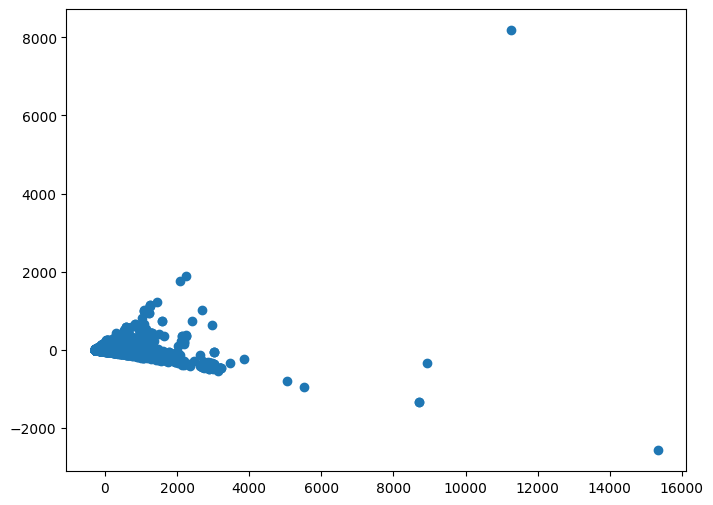

In [27]:
# Візуалізація даних

from sklearn.decomposition import PCA

# PCA до 2 компонентів
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

x1 = X2[:,:1]
y1 = X2[:,1:]

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.scatter(x1,y1)
plt.show()

In [28]:
# Поділ даних на тренувальну та тестову вибірки

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

---
###Завдання 3:  Реалізація моделі логістичної регресії
- Реалізуйте сигмоїдну функцію
- Реалізуйте функцію обчислення вихідних значень моделі
- Реалізуйте функцію обчислення вартості
- Реалізуйте функцію обчислення градієнту
- Реалізуйте функцію градієнтного спуску

In [29]:
# Сигмоїдна функція

def sigmoid(z):
    # Стабілізація для уникнення overflow
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

In [30]:
# Обчислення вихідних значень моделі

def compute_model_output(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)


In [31]:
# Обчислення функції вартості

def compute_cost(X, y, w, b, lambda_=0):
    m = X.shape[0]
    f_wb = compute_model_output(X, w, b)

    # Запобігання числовим проблемам
    f_wb = np.clip(f_wb, 1e-15, 1 - 1e-15)

    # Правильна формула з плюсом перед сумою
    cost = (1/m) * np.sum(-y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb))

    # Регуляризація
    if lambda_ > 0:
        cost += (lambda_ / (2 * m)) * np.sum(w**2)

    return cost

In [32]:
# Обчислення градієнту

def compute_gradient(X, y, w, b, lambda_=0):
    m, n = X.shape
    f_wb = compute_model_output(X, w, b)

    # Переконуємось, що форми співпадають
    if isinstance(y, np.ndarray) and len(y.shape) > 1:
        diff = f_wb - y.flatten()  # Перетворюємо y в одновимірний масив
    else:
        diff = f_wb - y

    # Використовуємо векторне множення матриць для правильного обчислення градієнта
    dj_dw = 1/m * np.dot(X.T, diff)
    dj_db = 1/m * np.sum(diff)

    # Додаємо регуляризацію
    if lambda_ > 0:
        dj_dw += (lambda_ / m) * w

    return dj_dw, dj_db

In [33]:
# Градієнтний спуск
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, lambda_=0):
    w = w_init.copy()
    b = b_init
    J_history = []

    m, n = X.shape
    # Cap alpha to prevent divergence
    alpha = min(alpha, 0.0001)

    # Ensure y is a 1D NumPy array of integers
    y_flat = y.flatten().astype(int) if y.ndim > 1 else y.astype(int)

    for i in range(num_iters):
        f_wb = compute_model_output(X, w, b)
        dj_dw = (1/m) * np.dot(X.T, (f_wb - y_flat))
        dj_db = (1/m) * np.sum(f_wb - y_flat)

        if lambda_ > 0:
            dj_dw += (lambda_ / m) * w

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(X, y_flat, w, b, lambda_)
        J_history.append(cost)

        if i % (num_iters // 10) == 0:
            print(f"Iteration {i}: Cost {cost:.6f}")

    return w, b, J_history

In [34]:
# Передбачення класів
def predict(X, w, b):
    f_wb = compute_model_output(X, w, b)
    # Забезпечуємо повернення цілих значень
    return (f_wb >= 0.5).astype(int)

# Обчислення точності
def compute_accuracy(X, y, w, b):
    predictions = predict(X, w, b)
    return np.mean(predictions == y) * 100

---
###Завдання 4: Створення інтерактивного інтерфейсу
- Використайте ipywidgets для створення інтерфейсу з наступними елементами:
 - Вибір параметрів навчання (швидкість навчання, кількість ітерацій)
 - Візуалізація процесу навчання
 - Вибір параметру регуляризації
 - Візуалізація межі прийняття рішень

In [42]:
def create_interactive_interface(X_train, y_train, X_test, y_test):
    # Створення віджетів
    alpha_slider = widgets.FloatSlider(
        value=0.01,
        min=0.0001,
        max=1.0,
        step=0.0001,
        description='Alpha:',
        continuous_update=False,
        readout_format='.4f'
    )

    iterations_slider = widgets.IntSlider(
        value=1000,
        min=100,
        max=10000,
        step=100,
        description='Iterations:',
        continuous_update=False
    )

    lambda_slider = widgets.FloatSlider(
        value=0.0,
        min=0.0,
        max=10.0,
        step=0.1,
        description='Lambda:',
        continuous_update=False
    )

    train_button = widgets.Button(
        description='Навчити модель',
        button_style='success'
    )

    output = widgets.Output()

    # Функція для навчання моделі при натисканні кнопки
    def on_train_button_clicked(b):
        with output:
            output.clear_output()

            alpha = alpha_slider.value
            num_iters = iterations_slider.value
            lambda_ = lambda_slider.value

            n = X_train.shape[1]
            w_init = np.zeros(n)
            b_init = 0

            print(f"Навчання моделі з alpha={alpha}, iterations={num_iters}, lambda={lambda_}")
            w, b, J_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters, lambda_)

            train_accuracy = compute_accuracy(X_train, y_train, w, b)
            test_accuracy = compute_accuracy(X_test, y_test, w, b)

            print(f"Точність на тренувальній вибірці: {train_accuracy:.2f}%")
            print(f"Точність на тестовій вибірці: {test_accuracy:.2f}%")

            # Ensure binary classes
            y_train_pred = predict(X_train, w, b)
            y_test_pred = predict(X_test, w, b)

            # Check for non-binary values
            if len(np.unique(y_train)) > 2 or len(np.unique(y_train_pred)) > 2:
                print("Non-binary classes detected.")
                print("Unique y_train:", np.unique(y_train))
                print("Unique y_train_pred:", np.unique(y_train_pred))
                raise ValueError("Non-binary classes in target or predictions.")

            # Metrics calculation
            train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(
                y_train, y_train_pred, average='binary'
            )
            test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
                y_test, y_test_pred, average='binary'
            )

            print(f"Тренувальні метрики: Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1-score={train_f1:.4f}")
            print(f"Тестові метрики: Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1-score={test_f1:.4f}")

            # Візуалізація кривої навчання
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            plt.plot(J_history)
            plt.xlabel("Ітерації")
            plt.ylabel("Функція вартості")
            plt.title("Крива навчання")

            # Візуалізація даних та межі прийняття рішень (для 2D або з PCA)
            plt.subplot(1, 2, 2)

            # Якщо більше 2 ознак, використовуємо PCA для візуалізації
            if X_train.shape[1] > 2:
                pca = PCA(n_components=2)
                X_train_pca = pca.fit_transform(X_train)
                X_test_pca = pca.transform(X_test)

                plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], marker='o', label='Клас 0 (тренування)')
                plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], marker='+', label='Клас 1 (тренування)')
                plt.scatter(X_test_pca[y_test==0, 0], X_test_pca[y_test==0, 1], marker='o', alpha=0.3, label='Клас 0 (тест)')
                plt.scatter(X_test_pca[y_test==1, 0], X_test_pca[y_test==1, 1], marker='+', alpha=0.3, label='Клас 1 (тест)')

                plt.xlabel("Головна компонента 1")
                plt.ylabel("Головна компонента 2")
                plt.title("PCA Візуалізація даних")
            else:
                # Для 2D даних можна напряму візуалізувати межу прийняття рішень
                plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o', label='Клас 0 (тренування)')
                plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='+', label='Клас 1 (тренування)')

                # Створення сітки для візуалізації межі прийняття рішень
                x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
                y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
                xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                    np.arange(y_min, y_max, 0.1))

                Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
                Z = Z.reshape(xx.shape)

                plt.contour(xx, yy, Z, levels=[0.5], colors='k')
                plt.xlabel("Ознака 1")
                plt.ylabel("Ознака 2")
                plt.title("Межа прийняття рішень")

            plt.legend()
            plt.tight_layout()
            plt.show()

            # Матриця помилок
            plt.figure(figsize=(10, 4))

            plt.subplot(1, 2, 1)
            cm_train = confusion_matrix(y_train, y_train_pred)
            plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title('Матриця помилок (тренування)')
            plt.colorbar()
            tick_marks = np.arange(2)
            plt.xticks(tick_marks, ['Клас 0', 'Клас 1'])
            plt.yticks(tick_marks, ['Клас 0', 'Клас 1'])
            plt.xlabel('Передбачений клас')
            plt.ylabel('Справжній клас')

            for i in range(2):
                for j in range(2):
                    plt.text(j, i, cm_train[i, j],
                            horizontalalignment="center",
                            color="white" if cm_train[i, j] > cm_train.max() / 2. else "black")

            plt.subplot(1, 2, 2)
            cm_test = confusion_matrix(y_test, y_test_pred)
            plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title('Матриця помилок (тестування)')
            plt.colorbar()
            tick_marks = np.arange(2)
            plt.xticks(tick_marks, ['Клас 0', 'Клас 1'])
            plt.yticks(tick_marks, ['Клас 0', 'Клас 1'])
            plt.xlabel('Передбачений клас')
            plt.ylabel('Справжній клас')

            for i in range(2):
                for j in range(2):
                    plt.text(j, i, cm_test[i, j],
                            horizontalalignment="center",
                            color="white" if cm_test[i, j] > cm_test.max() / 2. else "black")

            plt.tight_layout()
            plt.show()


    # Прив'язка функції до кнопки
    train_button.on_click(on_train_button_clicked)

    # Відображення всіх віджетів
    display(widgets.VBox([
        widgets.HBox([alpha_slider, iterations_slider, lambda_slider]),
        train_button,
        output
    ]))


In [45]:
# Нормалізація

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [46]:
# Приклад використання

create_interactive_interface(X_train_norm, y_train, X_test_norm, y_test)

---
###Завдання 5: Навчання та оцінка моделі
- Ініціалізуйте початкові значення параметрів
- Виконайте алгоритм градієнтного спуску для знаходження оптимальних параметрів
- Обчисліть точність моделі на тренувальній та тестовій вибірках
- Визначте інші метрики якості (precision, recall, F1-score)
- Проаналізуйте вплив параметра регуляризації на результати

In [38]:
# Виконано у завданні 4

# Alpha: 0.0108
# Iterations: 5800
# Lambda: 0
# n = X_train.shape[1]
# w_init = np.zeros(n)
# b_init = 0

# Точність на тренувальній вибірці: 90.05%
# Точність на тестовій вибірці: 89.36%
# Тренувальні метрики: Precision=0.8806, Recall=0.8648, F1-score=0.8727
# Тестові метрики: Precision=0.8650, Recall=0.8650, F1-score=0.8650

# Аналіз показує, що параметр регуляризації λ (lambda) в межах від 0.0 до 4.5 майже не впливає на результати моделі в наведених експериментах.



---
###Завдання 6: Аналіз результатів
- Візуалізуйте межу прийняття рішень на тренувальних та тестових даних
- Проаналізуйте криву навчання (learning curve)
- Зробіть висновки щодо якості моделі та запропонуйте шляхи її вдосконалення

In [ ]:
# виконується у завданні 4

# Модель поступово навчається і зменшує помилку. Проте досягнутий рівень помилки
# (0.58) може свідчити про складність задачі або недостатню складність моделі.
# Є потенціал для покращення якості моделі.